<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features</a></span><ul class="toc-item"><li><span><a href="#RMS" data-toc-modified-id="RMS-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RMS</a></span></li><li><span><a href="#RMS-centroid" data-toc-modified-id="RMS-centroid-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RMS centroid</a></span></li><li><span><a href="#Spectral-centroid" data-toc-modified-id="Spectral-centroid-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Spectral centroid</a></span></li><li><span><a href="#Spectral-bandwidth" data-toc-modified-id="Spectral-bandwidth-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Spectral bandwidth</a></span></li><li><span><a href="#Spectral-contrast" data-toc-modified-id="Spectral-contrast-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Spectral contrast</a></span></li><li><span><a href="#Spectral-flatness" data-toc-modified-id="Spectral-flatness-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Spectral flatness</a></span></li><li><span><a href="#Spectral-roll-off" data-toc-modified-id="Spectral-roll-off-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Spectral roll off</a></span></li><li><span><a href="#Zero-crossing-rate" data-toc-modified-id="Zero-crossing-rate-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Zero crossing rate</a></span></li></ul></li><li><span><a href="#Featurization" data-toc-modified-id="Featurization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Featurization</a></span></li><li><span><a href="#Split" data-toc-modified-id="Split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#errors" data-toc-modified-id="errors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>errors</a></span><ul class="toc-item"><li><span><a href="#cymbal-predicted-as-hi-hat" data-toc-modified-id="cymbal-predicted-as-hi-hat-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>cymbal predicted as hi hat</a></span></li><li><span><a href="#hi-hat-predicted-as-cymbal" data-toc-modified-id="hi-hat-predicted-as-cymbal-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>hi hat predicted as cymbal</a></span></li><li><span><a href="#hi-hat-predicted-as-shaken" data-toc-modified-id="hi-hat-predicted-as-shaken-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>hi hat predicted as shaken</a></span></li></ul></li></ul></div>

In [1]:
import librosa
import librosa.display
import numpy as np
from librosa.core import resample, load
from librosa.util import fix_length
from librosa import feature
from pandas import read_csv
from pandas import DataFrame
from tqdm import tqdm
from tqdm.notebook import tqdm as nb_tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
data = read_csv('data.csv', index_col=0)

In [3]:
data

,path,class_Snare,class_Tom,class_Cymbal,class_Hat,class_Kick,class_Conga,class_Cowbell,class_Rimshot,class_Clap,class_Shaken
11005,./Samples/200-drum-machines/Boss DR-660/DR-660...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5717,./Samples/MDLib2.2/Sorted/Snare SNoff/Rim/MN_S...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2551,./Samples/MDLib2.2/Sorted/Snare/Buzz/MN_Snare_...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17864,./Samples/wavegan-drums/train/Snare_00684.wav,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3245,./Samples/MDLib2.2/Sorted/Snare/Rim/DI_Snare_R...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19542,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19639,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19640,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19646,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
features = data[['path']]

In [5]:
SR = 22050
soundtestfile = data.iloc[0, 0]
soundtest, _ = load(soundtestfile, sr=SR)
soundtest = fix_length(soundtest, 1024*(SR//1024))

In [6]:
classes = [c for c in data.columns if c.startswith('class_')]

# Features

In [7]:
test_samples = {}
indices=[2,0,0,0,2,3,0,2,0,0]
for c,i in zip(classes, indices):
    test_samples[c] = data[data[c]==1].iloc[i,0]
test_samples

{'class_Snare': './Samples/MDLib2.2/Sorted/Snare/Buzz/MN_Snare_Buzz_1231.3.wav',
 'class_Tom': './Samples/200-drum-machines/Alesis Hr16b/MaxV - Tom Mid.wav',
 'class_Cymbal': './Samples/MDLib2.2/Sorted/Cymbals/Dark Crash/Clamp/MN_Dark Crash_Clamp_1114.2.wav',
 'class_Hat': './Samples/MDLib2.2/Sorted/Cymbals/HiHat/Tip/MN_HiHat_Tip_1323.2.wav',
 'class_Kick': './Samples/MDLib2.2/Sorted/Kick/Dead Kick/Release/MN_Dead Kick_Release_1111.3.wav',
 'class_Conga': './Samples/200-drum-machines/Akai Mpc60/MaxV - Conga.wav',
 'class_Cowbell': './Samples/200-drum-machines/AKAI XE-8/MaxV - XE8 Cowbell 1 ext_12.wav',
 'class_Rimshot': './Samples/200-drum-machines/Akai Mpc60/MaxV - Rimshot 1.wav',
 'class_Clap': './Samples/wavegan-drums/train/Clap_02146.wav',
 'class_Shaken': './Samples/200-drum-machines/Akai XR10/XR10Tamborine.wav'}

class_Snare


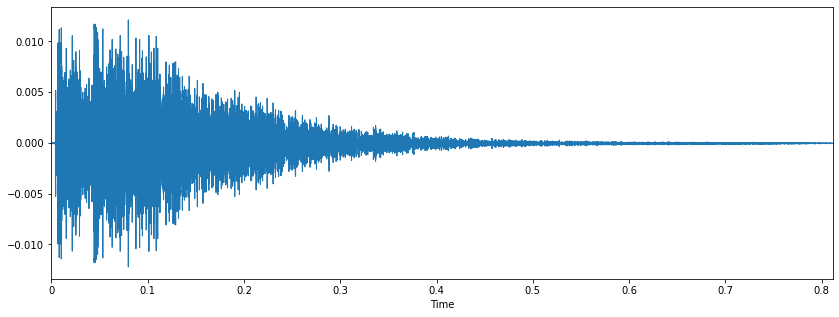

class_Tom


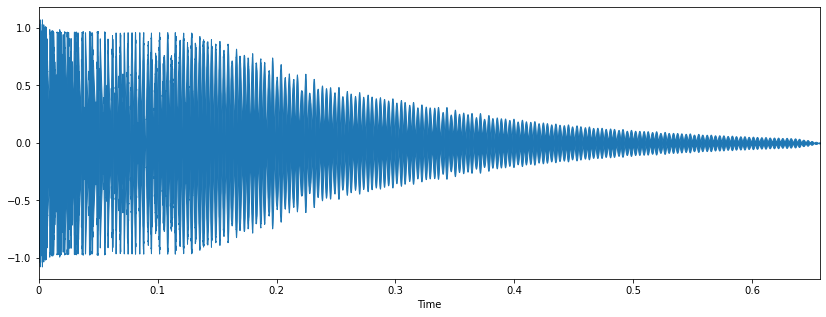

class_Cymbal


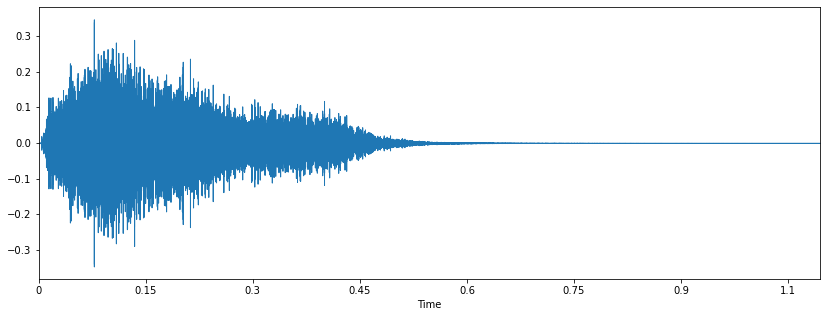

class_Hat


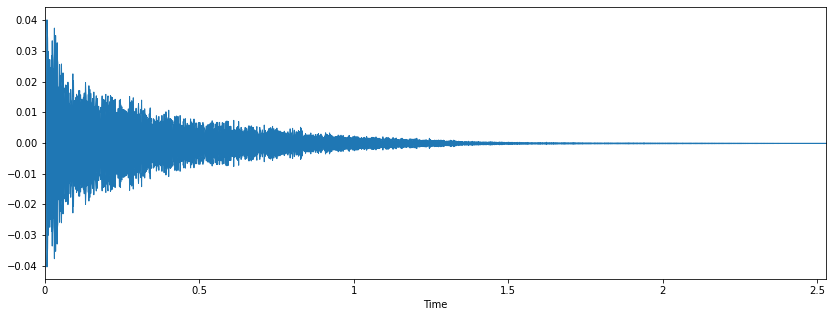

class_Kick


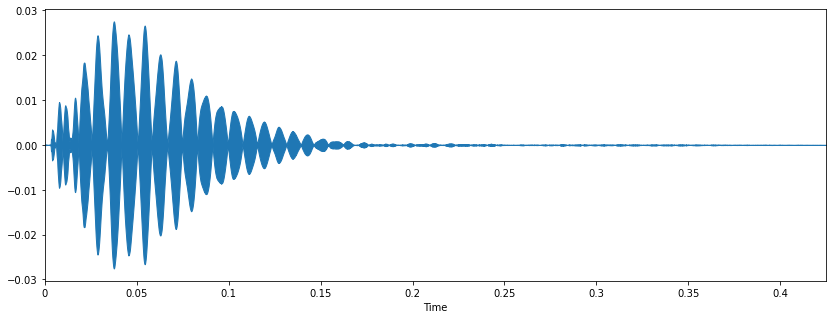

class_Conga


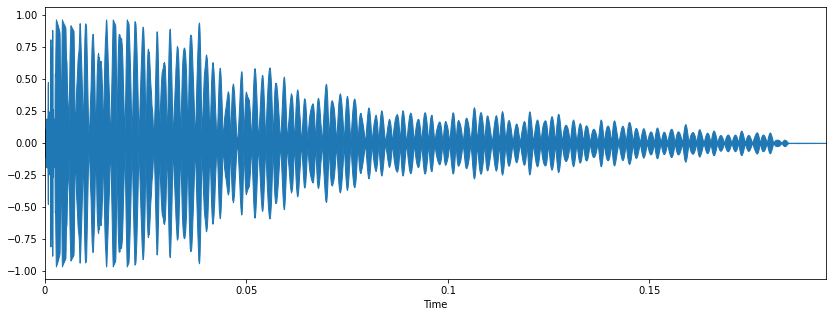

class_Cowbell


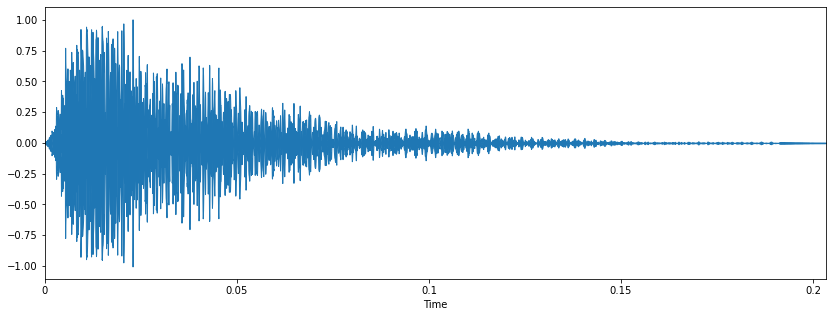

class_Rimshot


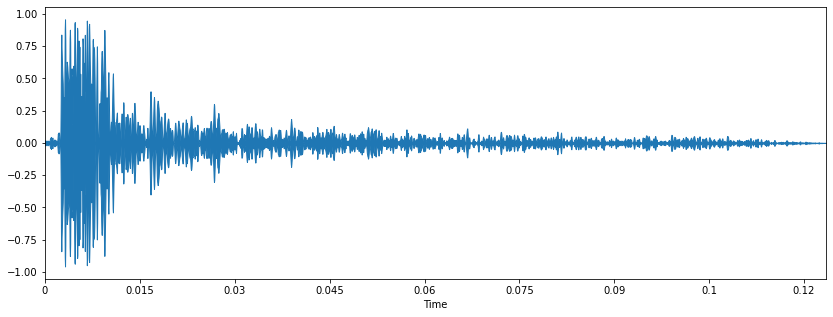

class_Clap


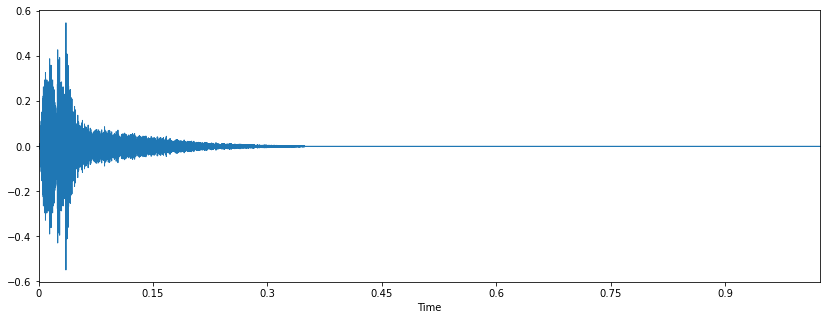

class_Shaken


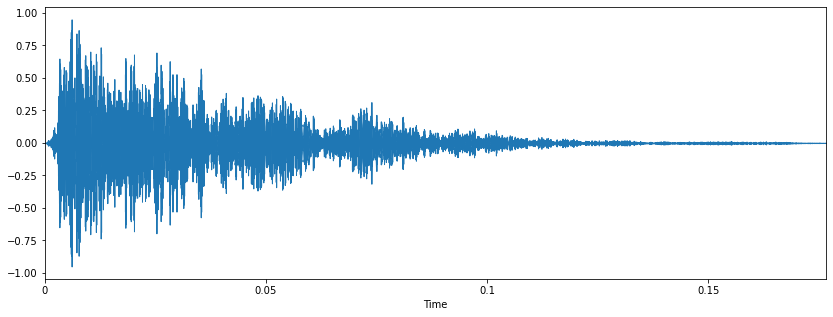

In [8]:
test_sounds = {}
for c, path in test_samples.items():
    print(c)
    test_sounds[c], sr = librosa.load(path, sr=22050)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(test_sounds[c], sr=sr)
    plt.show()
    ipd.display(ipd.Audio(test_sounds[c], rate=sr))

## RMS

Evolution du volume au cours du temps sur des fenetres glissantes.

TODO calculer centroid dans le domaine temporel + kurtosis et skewness

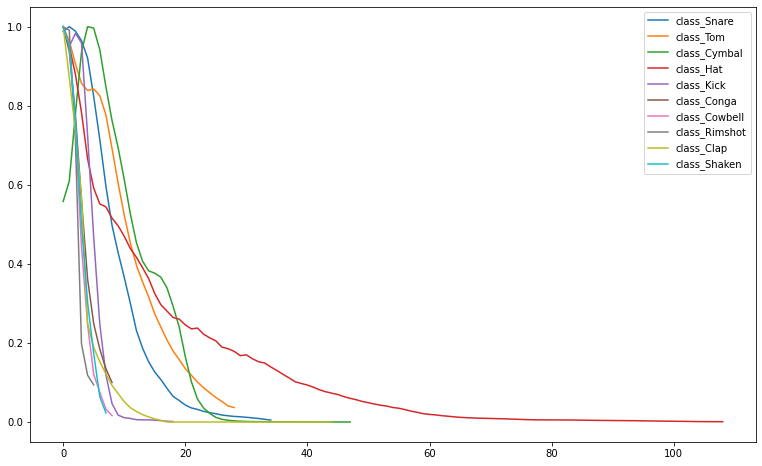

In [69]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.rms(sound).reshape(-1)
    curve = curve/curve.max()
    #curve = curve*curve
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## RMS centroid

In [10]:
for c, sound in test_sounds.items():
    rms = feature.rms(sound)[0]
    centroid = (rms * np.arange(len(rms))).sum() / rms.sum()
    print(c, centroid)

class_Snare 5.929521465043339
class_Tom 7.6103589065962565
class_Cymbal 8.142167873333136
class_Hat 15.9188741047431
class_Kick 2.6046580570917506
class_Conga 2.2565333964346217
class_Cowbell 1.6986194124260692
class_Rimshot 1.27009741097831
class_Clap 2.6107332873978395
class_Shaken 1.746929838941787


## Spectral centroid

Centre de gravité en Hz (esperence de la fréquence)

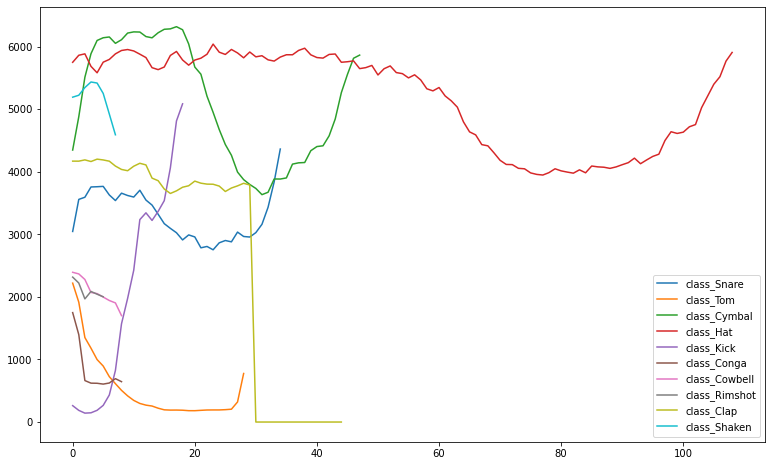

In [11]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.spectral_centroid(sound, sr=SR).reshape(-1)
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## Spectral bandwidth

Lié à l'ecart type de la fréquence autour du centroide. (pour p=2)

pour p = 3 ou 4 on a des mesures liés au skewness et kurtosis

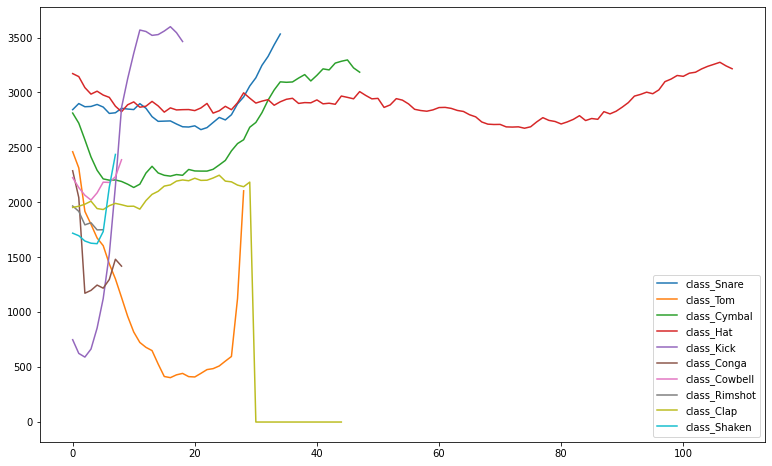

In [12]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.spectral_bandwidth(sound, sr=SR).reshape(-1)
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## Spectral contrast

Rapport entre les cretes et les creux du spectre par bande de fréquences.
Devrait donner une indication du SNR

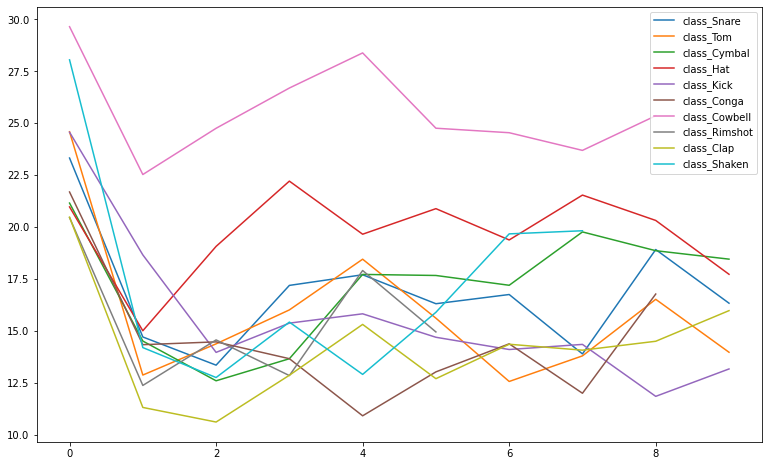

In [13]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.spectral_contrast(sound, sr=SR)
    #print(curve.shape)
    #curve = curve.sum(axis=0)[:10]
    curve = curve[4][:10]
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## Spectral flatness

Donne une mesure du rapport signal sur bruit.

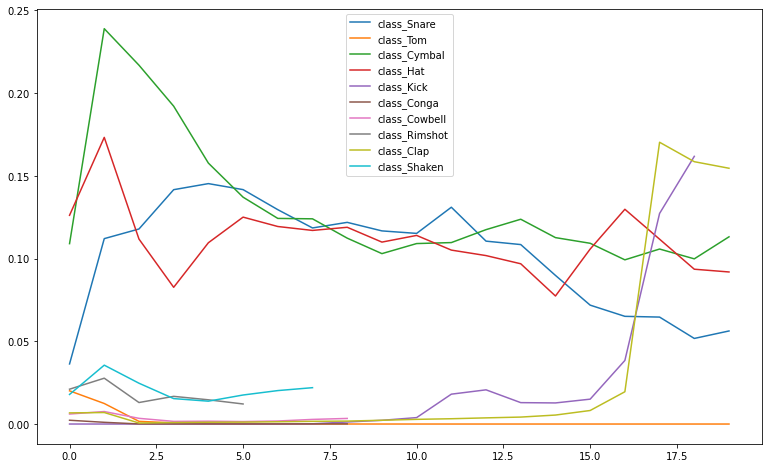

In [14]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.spectral_flatness(sound).reshape(-1)[:20]
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## Spectral roll off

Fréquence de coupure a 85%

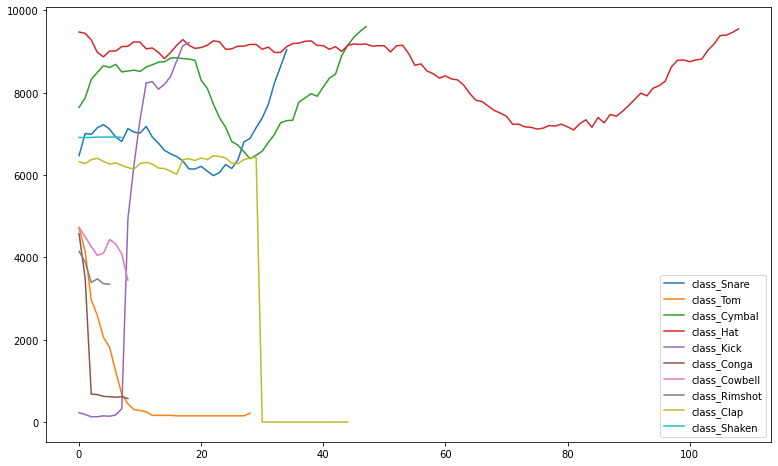

In [15]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.spectral_rolloff(sound, sr=SR).reshape(-1)
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

## Zero crossing rate

Compte le nombre de fois que la courbe croise y=0

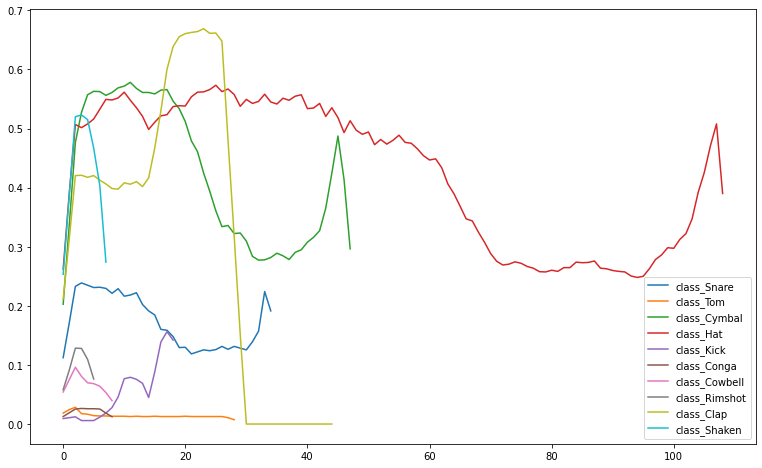

In [16]:
plt.figure(figsize=(13,8))
for c, sound in test_sounds.items():
    curve = feature.zero_crossing_rate(sound).reshape(-1)
    sns.lineplot(y=curve, x=range(len(curve)), label=c)

# Featurization

In [17]:
index = data.index
files = data['path']
features = DataFrame()

In [18]:
SR=22050
#data = data.sample(frac=0.2)
for index, file in tqdm(zip(data.index, data['path']), total=len(data.index), position=0, leave=True):
    sound, _ = load(file, sr=SR)
    
    
    rms = feature.rms(sound)[0]
     #normalize by rms of attack frame
    rms_centroid = (rms * np.arange(len(rms))).sum() / rms.sum()
    features.loc[index, 'rms_centroid'] = rms_centroid
    
    sound = sound/rms.max()
    sound = fix_length(sound, 1024*(SR//1024))
    
    zero_cr = feature.zero_crossing_rate(sound)[0]
    columns = ['zero_cr_' + str(x) for x in range(zero_cr.shape[0])]
    for col, value in zip(columns, zero_cr):
        features.loc[index, col] = value
        
    spect_cent = feature.spectral_centroid(sound, sr=SR)[0]
    columns = ['spect_cent_' + str(x) for x in range(spect_cent.shape[0])]
    for col, value in zip(columns, spect_cent):
        features.loc[index, col] = value
        
    spect_ro = feature.spectral_rolloff(sound, sr=SR)[0]
    columns = ['spect_ro_' + str(x) for x in range(spect_ro.shape[0])]
    for col, value in zip(columns, spect_ro):
        features.loc[index, col] = value
        
    rms = feature.rms(sound)[0]
    columns = ['rms_' + str(x) for x in range(rms.shape[0])]
    for col, value in zip(columns, rms):
        #features.loc[index, col] = value
        features.loc[index, 'norm_'+ col] = value
    
        
    spect_cont = feature.spectral_contrast(sound, sr=SR)
    for i in range (spect_cont.shape[0]):
        for j in range (spect_cont.shape[1]):
            col = 'spec_cont_' + str(i) + '_' + str(j)
            features.loc[index, col] = spect_cont[i][j]

100%|██████████| 1704/1704 [02:32<00:00, 11.18it/s]


In [19]:
features.to_csv('features.csv')

In [20]:
Y = data.loc[features.index,[c for c in data.columns if c.startswith('class_')]]
#Y = data.fillna(0)

# Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.2)
train_index, test_index = next(sss.split(features, Y))
train_X = features.iloc[train_index,:]
valid_X = features.iloc[test_index,:]
train_Y = Y.iloc[train_index,:]
valid_Y = Y.iloc[test_index,:]

#train_X, valid_X , train_Y, valid_Y = train_test_split(features, data, test_size=0.8)

In [22]:
train_X[train_X.isnull().any(axis=1)]


,rms_centroid,zero_cr_0,zero_cr_1,zero_cr_2,zero_cr_3,zero_cr_4,zero_cr_5,zero_cr_6,zero_cr_7,zero_cr_8,...,spec_cont_6_33,spec_cont_6_34,spec_cont_6_35,spec_cont_6_36,spec_cont_6_37,spec_cont_6_38,spec_cont_6_39,spec_cont_6_40,spec_cont_6_41,spec_cont_6_42


# Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', class_weight= 'balanced')
#clf = DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)

In [24]:
valid_Y_pred =  clf.predict_proba(valid_X)
pred= [ valid_Y_pred[i][j][1] for j in range(len(valid_Y_pred[0])) for i in range(Y.shape[1])  ]
pred = np.asarray(pred).reshape(-1, Y.shape[1])

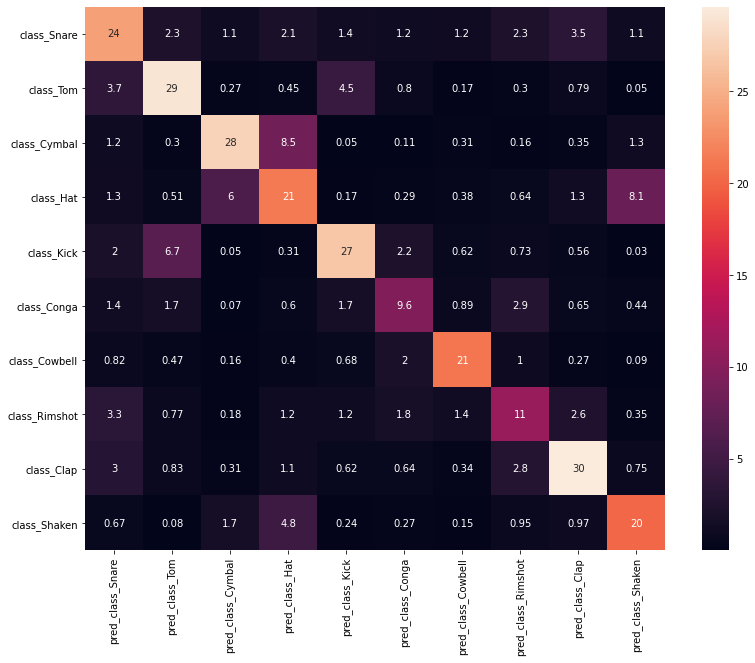

In [25]:
matrix = np.zeros([Y.shape[1],Y.shape[1]], dtype = float)
for probas, y in zip(pred, valid_Y.values):
    y = y.argmax()
    matrix[y] += probas
matrix_df = DataFrame(matrix, index=valid_Y.columns, columns='pred_'+valid_Y.columns)
plt.figure(figsize = (13,10))
sns.heatmap(matrix_df, annot=True);

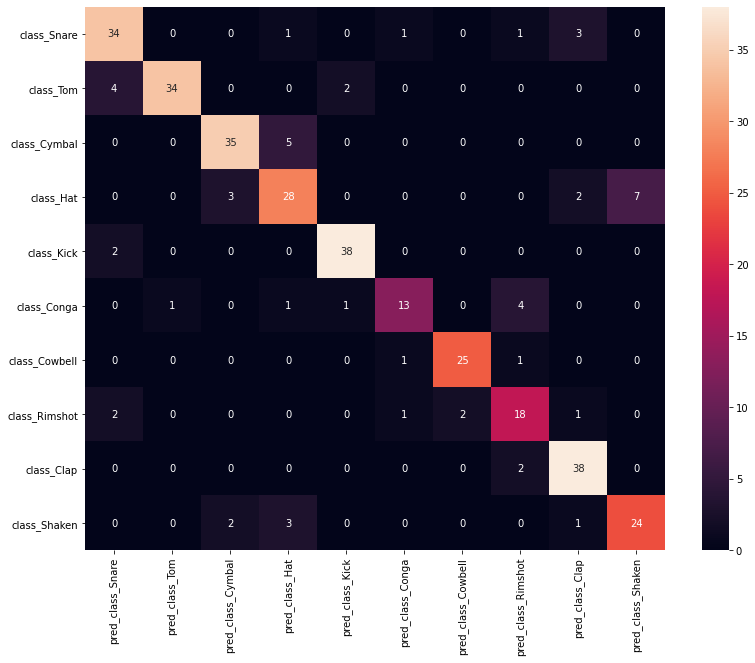

In [26]:
valid_Y_class = valid_Y.values.argmax(axis=1)
valid_Y_pred_class = pred.argmax(axis=1)
matrix = confusion_matrix(valid_Y_class, valid_Y_pred_class)
matrix_df = DataFrame(matrix, index=valid_Y.columns, columns='pred_'+valid_Y.columns)
plt.figure(figsize = (13,10))
sns.heatmap(matrix_df, annot=True);

In [27]:
print(classification_report(valid_Y_class, valid_Y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.97      0.85      0.91        40
           2       0.88      0.88      0.88        40
           3       0.74      0.70      0.72        40
           4       0.93      0.95      0.94        40
           5       0.81      0.65      0.72        20
           6       0.93      0.93      0.93        27
           7       0.69      0.75      0.72        24
           8       0.84      0.95      0.89        40
           9       0.77      0.80      0.79        30

    accuracy                           0.84       341
   macro avg       0.84      0.83      0.83       341
weighted avg       0.84      0.84      0.84       341



In [28]:
valid_Y.values[0].argmax()

1

[]

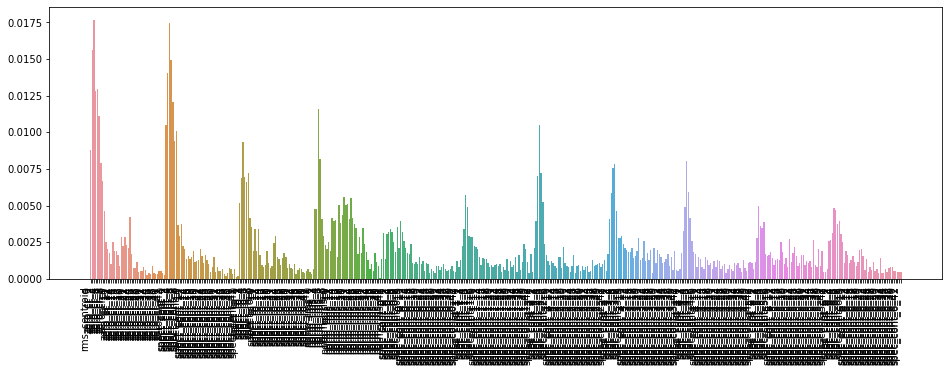

In [29]:
len(clf.feature_importances_) , len(features.columns)
bars = DataFrame(data=[clf.feature_importances_], columns = features.columns, index = ['score'])
plt.figure(figsize = (16,5))
chart = sns.barplot(data=bars)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.plot()

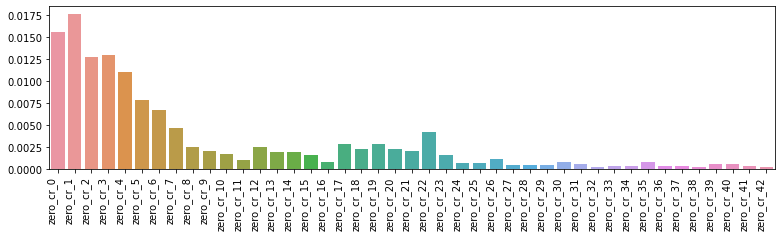

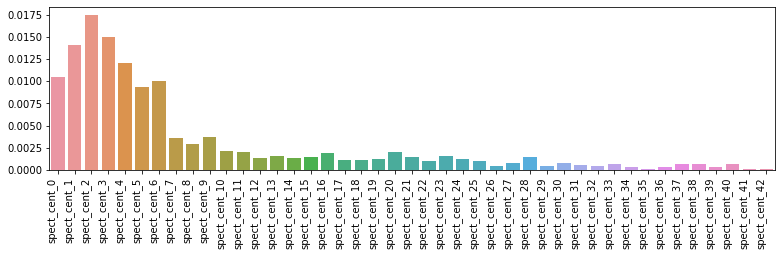

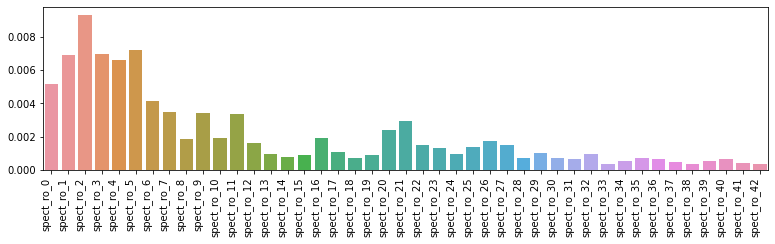

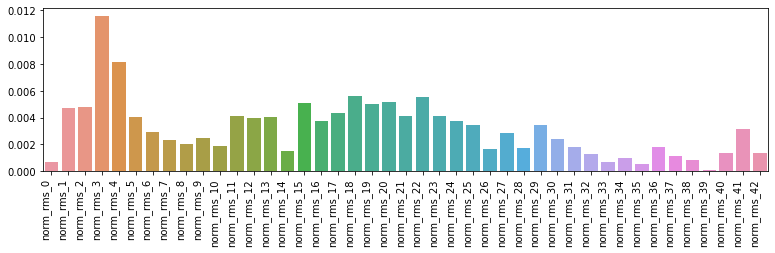

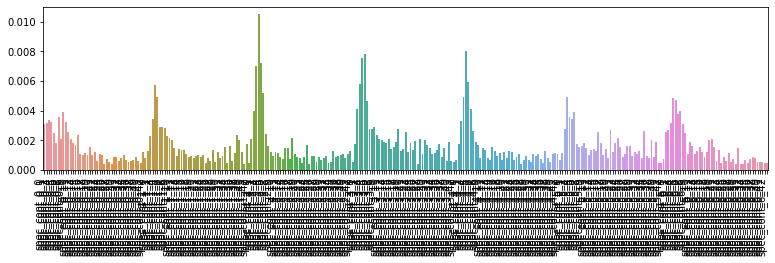

In [30]:
for prefix in ['zero_cr','spect_cent', 'spect_ro', 'norm_rms', 'spec_cont']:
    columns = [c for c in bars.columns if c.startswith(prefix)]
    plt.figure(figsize=(13,3))
    chart = sns.barplot(data=bars[columns])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show()

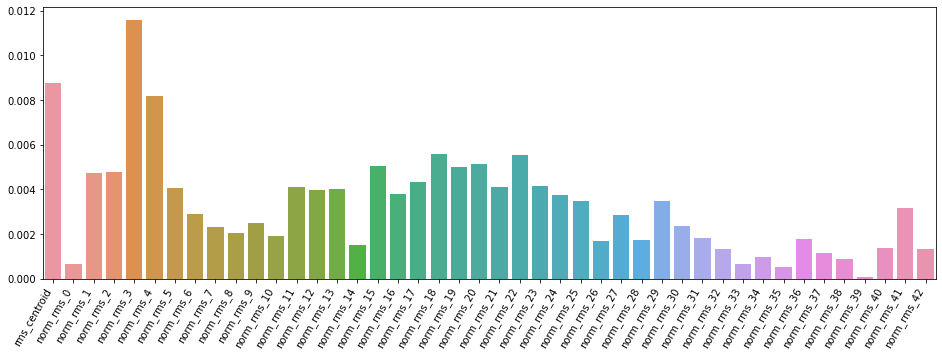

In [35]:
bars = DataFrame(data=[clf.feature_importances_], columns = features.columns, index = ['score'])
cols = [c for c in features.columns if c.startswith('rms_') or c.startswith('norm_rms_') ]
bars = bars[cols]
plt.figure(figsize = (16,5))
chart = sns.barplot(data=bars)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

In [34]:
# from sklearn.svm import SVC
# svc = SVC(decision_function_shape='ovr')
# svc.fit(train_X, train_Y.values.argmax(axis=1))
# valid_Y_pred =  svc.predict(valid_X)
# matrix = confusion_matrix(valid_Y.values.argmax(axis=1), valid_Y_pred)
# matrix_df = DataFrame(matrix,Y.columns index=valid_Y.columns, columns=valid_Y.columns)
# plt.figure(figsize = (15,10))
# sn.heatmap(matrix_df, annot=True)

# errors

In [44]:
errors = valid_Y_pred_class != valid_Y_class
data.loc[valid_Y[errors].index]

,path,class_Snare,class_Tom,class_Cymbal,class_Hat,class_Kick,class_Conga,class_Cowbell,class_Rimshot,class_Clap,class_Shaken
8003,./Samples/MDLib2.2/Sorted/Cymbals/HiHat/Tip/MN...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10013,./Samples/200-drum-machines/Alesis DM5/DM5Rim0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14442,./Samples/200-drum-machines/Roland Tr-606/TR60...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19507,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18029,./Samples/wavegan-drums/train/Snare_01225.wav,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15002,./Samples/200-drum-machines/Sequential Drumtra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17329,./Samples/wavegan-drums/train/Kick_01372.wav,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13726,./Samples/200-drum-machines/Roland MT32/MaxV -...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15937,./Samples/200-drum-machines/Yamaha RY30/RY30Ri...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008,./Samples/200-drum-machines/Alesis DM5/DM5Rim0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## cymbal predicted as hi hat

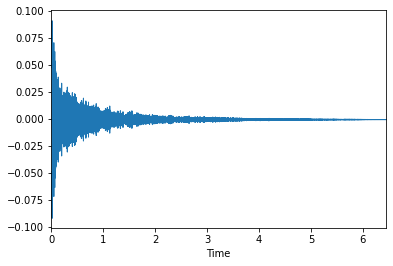

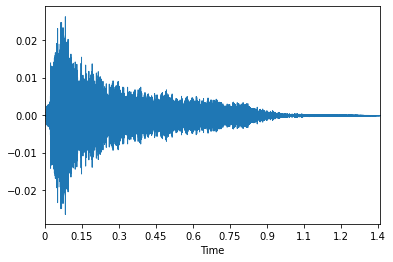

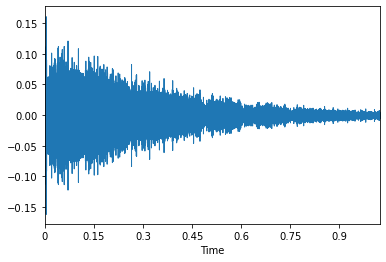

In [54]:
errors = (valid_Y_pred_class == 2) & (valid_Y_class == 3)
error_files = data.loc[valid_Y[errors].index,'path']

for file in error_files:
    sound, _ = load(file, sr=SR)
    librosa.display.waveplot(sound, sr=SR)
    plt.show()
    ipd.display(ipd.Audio(sound, rate=SR))

## hi hat predicted as cymbal

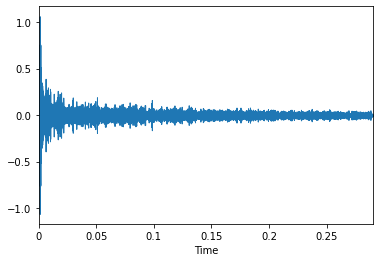

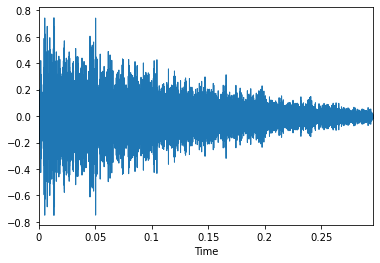

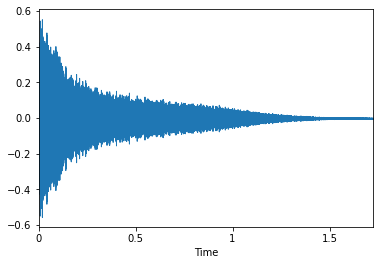

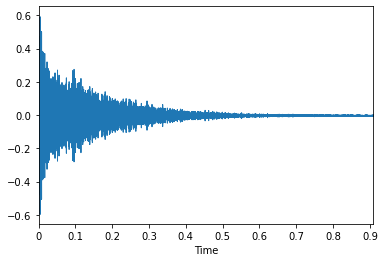

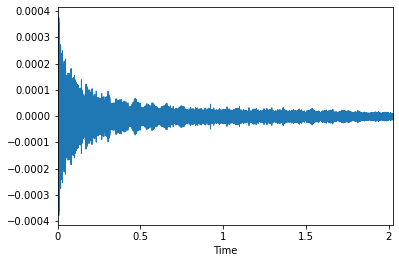

[[0.04 0.05 0.22 0.35 0.01 0.02 0.04 0.   0.   0.27]
 [0.   0.01 0.06 0.46 0.   0.   0.   0.04 0.   0.43]
 [0.   0.01 0.38 0.44 0.   0.01 0.   0.   0.   0.16]
 [0.05 0.02 0.27 0.41 0.   0.02 0.   0.01 0.02 0.2 ]
 [0.   0.   0.46 0.51 0.   0.   0.   0.   0.   0.03]]


In [66]:
errors = (valid_Y_pred_class == 3) & (valid_Y_class == 2)
errors_index = valid_Y.iloc[errors].index
error_files = data.loc[errors_index,'path']

for file in error_files:
    sound, _ = load(file, sr=SR)
    librosa.display.waveplot(sound, sr=SR)
    plt.show()
    ipd.display(ipd.Audio(sound, rate=SR))
errors_Y_pred = clf.predict_proba(valid_X.iloc[errors])
pred= [ errors_Y_pred[i][j][1] for j in range(len(errors_Y_pred[0])) for i in range(Y.shape[1])  ]
pred = np.asarray(pred).reshape(-1, Y.shape[1])
print(pred)

## hi hat predicted as shaken

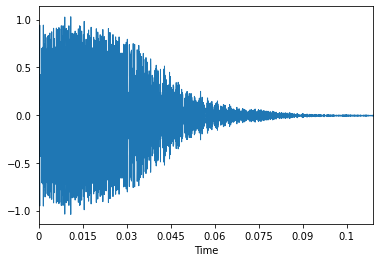

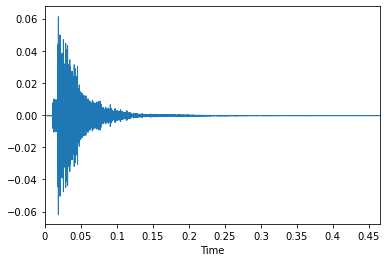

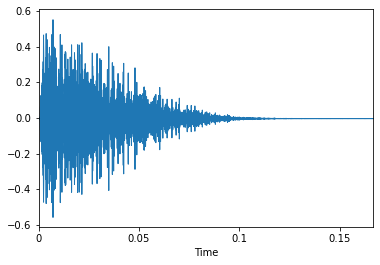

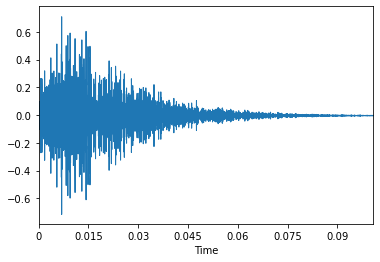

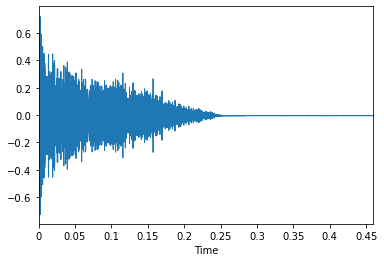

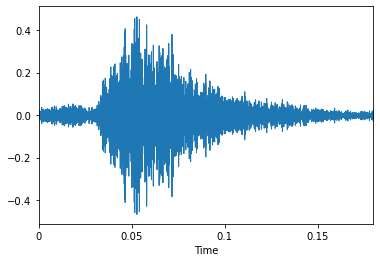

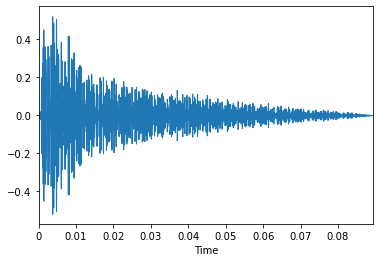

[[0.   0.   0.01 0.   0.01 0.   0.   0.   0.01 0.97]
 [0.03 0.   0.05 0.37 0.   0.   0.   0.02 0.02 0.51]
 [0.   0.   0.01 0.04 0.   0.   0.   0.   0.   0.95]
 [0.05 0.   0.02 0.12 0.02 0.02 0.02 0.02 0.   0.73]
 [0.03 0.01 0.09 0.23 0.   0.   0.01 0.04 0.02 0.57]
 [0.03 0.   0.   0.21 0.01 0.   0.   0.03 0.   0.72]
 [0.   0.   0.06 0.26 0.   0.   0.14 0.02 0.   0.52]]


In [68]:
errors = (valid_Y_pred_class == 9) & (valid_Y_class == 3)
errors_index = valid_Y.iloc[errors].index
error_files = data.loc[errors_index,'path']

for file in error_files:
    sound, _ = load(file, sr=SR)
    librosa.display.waveplot(sound, sr=SR)
    plt.show()
    ipd.display(ipd.Audio(sound, rate=SR))
errors_Y_pred = clf.predict_proba(valid_X.iloc[errors])
pred= [ errors_Y_pred[i][j][1] for j in range(len(errors_Y_pred[0])) for i in range(Y.shape[1])  ]
pred = np.asarray(pred).reshape(-1, Y.shape[1])
print(pred)